In [1]:
import numpy as np
import theano
import theano.tensor as T

In [2]:
# 绘图模块
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_predict(x, w, b):
        return np.dot(w, x) + b

def plot_decsion_plane(X_data, y_data, w, b):
    # 画决策面
    colors = ['red', 'blue']
    cmap = ListedColormap(colors[:len(np.unique(y_data))])
    x1_min, x1_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    x2_min, x2_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
    Z = plot_predict(np.array([xx1.ravel(), xx2.ravel()]), w, b)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 画样本点
    markers = ('x', 'o')
    for idx, ci in enumerate(np.unique(y_data)):
        plt.scatter(x=X_data[y_data == ci, 0], y=X_data[y_data == ci, 1], alpha=0.8, c=np.atleast_2d(cmap(idx)), 
                    marker=markers[idx], label=ci)

    # 画图例
    plt.legend(loc='upper left')
    plt.show()

In [3]:
# 定义训练数据
X_data = np.array([[3,3],
              [4,3],
              [1,1]])
y_data = np.array([1, 1, -1])
D = (X_data, y_data)

In [4]:
# 学习速率
eta0 = 1.0
# 最大训练迭代次数
training_steps = 20

# 随机变量生成器
rng = np.random

# 声明theano符号变量
x = T.dmatrix("x")
y = T.dvector("y")

# 随机初始化权重向量w
# w和偏置变量b都为共享变量，
# 在训练迭代过程中（updates）能构保存它们的上一次迭代时的值plot_decsion_plane
w = theano.shared(rng.randn(D[0].shape[1]), name="w")
# 初始化偏置项
b = theano.shared(0., name="b")

print("初始化模型")
print("w=", w.get_value(), end=" ")
print("b=", b.get_value())


# 创建theano表达式图
p_1 = T.dot(x, w) + b                                               # 感知机预测概率公式
prediction = T.sgn(p_1)                                             # 感知机预测阈值
cost = -T.sum(T.dot(T.cast(T.neq(y,prediction), 'float32'),y*p_1))  # 错误分类实例驱动
gw, gb = T.grad(cost, [w, b])                                       # 计算损失函数梯度


# 编译
train = theano.function(
          inputs=[x,y],
          outputs=[prediction, cost],
          updates=((w, w - eta0 * gw), (b, b - eta0 * gb))) # 学习效率为1
predict = theano.function(inputs=[x], outputs=prediction)

# 训练
for i in range(training_steps):
    pred, cost = train(D[0], D[1])
    print("iter %d"%i)
    print("w=", w.get_value(), end=" ")
    print("b=", b.get_value(), end=" ")
    print("cost=%f" % cost)

初始化模型
w= [ 0.41537411  2.56009845] b= 0.0
iter 0
w= [-0.58462589  1.56009845] b= -1.0 cost=2.975473
iter 1
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 2
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 3
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 4
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 5
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 6
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 7
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 8
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 9
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 10
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 11
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 12
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 13
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 14
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 15
w= [-0.58462589  1.56009845] b= -1.0 cost=-0.000000
iter 16
w

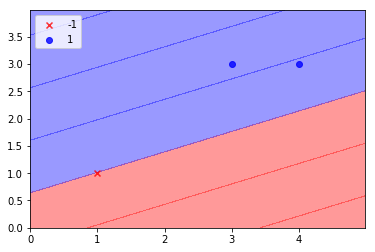

In [5]:
# 画决策面
plot_decsion_plane(X_data, y_data, w.get_value(), b.get_value())